In [1]:
def compute_posterior(trial_data, response_index, parameter):
    posterior = []
    response_time  = []
    for idx in range(0, 525):
        trial = trial_data[idx]
        if (not str(trial[0]) == 'nan') and (not str(trial[8]) == 'nan') and trial[response_index] <= 2: #BiSensory Trial 
            response_time.append(trial[response_index])
            flash_deg = trial[3]
            sound_deg = trial[11]

            if flash_deg > 0:
                flash_deg = flash_deg - abs(parameter[3])
            elif flash_deg < 0:
                flash_deg = flash_deg + abs(parameter[3])

            if sound_deg > 0:
                sound_deg = sound_deg + abs(parameter[4])
            elif flash_deg < 0:
                sound_deg = sound_deg - abs(parameter[4])

            up   = parameter[6]
            varp = parameter[7]

            varv = parameter[1]
            vara = parameter[2]

            pcommon = parameter[0]

            # likelihood_independent  
            term1 = 1.0 / (2.0 * np.pi * ((vara + varp) * (varv + varp)) ** 0.5 ) 
            term2 = -0.5 * ((sound_deg - up) ** 2 / (vara + varp) + (flash_deg - up) ** 2 / (varv + varp))
            likelihood_independent = term1 * np.exp(term2)

            # likelihood_common
            term1 = 1.0 / (2.0 * np.pi * (vara*varv + vara*varp + varv*varp) ** 0.5)
            term2 = (flash_deg - sound_deg) ** 2 *varp + (flash_deg - up) ** 2 *vara + (sound_deg - up) ** 2 *varv
            term3 = -0.5 * term2 / (vara*varv + vara*varp + varv*varp)
            likelihood_common = term1 * np.exp(term3)

            pcommon_post = likelihood_common * pcommon / (likelihood_common * pcommon + likelihood_independent * (1-pcommon))
            posterior.append(pcommon_post)
    return (posterior, response_time)

In [2]:
import os 
import scipy.io
files = os.listdir('./Data')
path = 'Data/'

subjects = []
for subject in files:
    subjects.append((scipy.io.loadmat(path + subject)))

In [3]:
parameters = scipy.io.loadmat('Params.mat')
Pcommon = parameters['Params'][:, 0]

In [4]:
import numpy as np

In [5]:
all_posterior = []
all_response  = []

for subject_idx in range(0 ,len(subjects)):
    subject_data = subjects[subject_idx]
    
    order = subject_data['PROMPT_ORDER'][0]  
    reponse_index = 7 if order == 'LIGHT' else 15
    
    trial_data = subject_data['trialData']
    parameter = parameters['Params'][subject_idx, :]
    
    posterior, response_time = compute_posterior(trial_data, reponse_index, parameter)

    all_posterior = all_posterior + posterior
    all_response = all_response + response_time

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('ggplot')

array([[ 1.        ,  0.03991985],
       [ 0.03991985,  1.        ]])

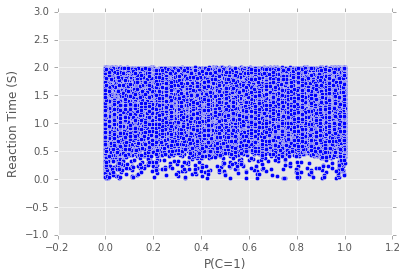

In [9]:
plt.scatter(all_posterior, all_response)
plt.xlabel('P(C=1)')
plt.ylabel('Reaction Time (S)')
plt.ylim([-1, 3])
np.corrcoef(all_posterior, all_response)

(-1, 2)

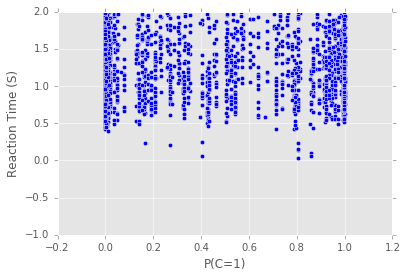

In [11]:
plt.scatter(all_posterior[1:2000], all_response[1:2000])
plt.xlabel('P(C=1)')
plt.ylabel('Reaction Time (S)')
plt.ylim([-1, 2])

### For Visual Or Auditory Input

(-1, 10)

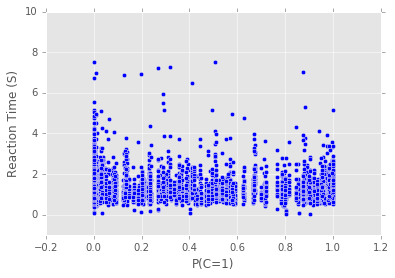

In [68]:
all_posterior = []
all_response  = []

for subject_idx in range(0 ,len(subjects)):
    subject_data = subjects[subject_idx]
    
    order = subject_data['PROMPT_ORDER'][0]  
    reponse_index = 7
    if order == 'LIGHT':    
        trial_data = subject_data['trialData']
        parameter = parameters['Params'][subject_idx, :]

        posterior, response_time = compute_posterior(trial_data, reponse_index, parameter)

        all_posterior = all_posterior + posterior
        all_response = all_response + response_time

plt.scatter(all_posterior[1:4000], all_response[1:4000])
plt.xlabel('P(C=1)')
plt.ylabel('Reaction Time (S)')
plt.ylim([-1, 10])

(-1, 5)

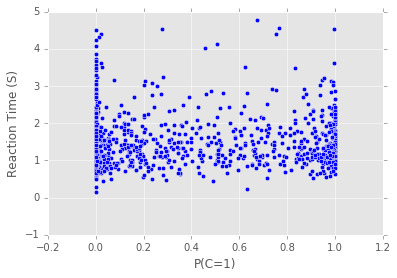

In [72]:
posteriors = []
responses  = []

indexes = np.random.choice(len(all_posterior), 1000)
for i in indexes:
    posteriors.append(all_posterior[i])
    responses.append(all_response[i])
    
plt.scatter(posteriors, responses)
plt.xlabel('P(C=1)')
plt.ylabel('Reaction Time (S)')
plt.ylim([-1, 5])